# 그레인저 인과관계 검정(Granger Causality Test)을 통한 시가총액 상위 10개의 암호화폐 간의 분단위 인과관계 분석
- 각 암호화폐와 다른 여러 암호화폐간의 최대 100분의 시차를 둠으로써, 특정 암호화폐가 최대 100분의 시간동안 타 암호화폐에 어느정도 영향력을 행사하는지 그레인저 인과관계 검정을 하고 p-value로 이를 확인. p-value가 유의수준 0.05 이하일 경우 영향력을 행사한다고 보고, 0.01 이하일 경우 강력한 영향력을 보인다고 판단

In [1]:
# 필요한 라이브러리 설치
# !pip install ccxt
# 예시 데이터로 사용할 비트코인 데이터를 가져오기 위해 바이낸스 api 사용

import ccxt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

binance = ccxt.binance()

# 암호화폐 집함의 데이터프레임을 생성하는 함수
'''
crypto_list:암호화폐의 티커로 이뤄진 리스트
feature: OHLCV중 선택. 여기서는 종가(close) 사용
timeframe: 데이터 간격 설정. 여기서는 분단위이므로 '1m'로 설정
limit: 불러올 데이터 크기. 여기서는 1000개를 불러옴
'''
def cryptoSet(crypto_list, feature, timeframe, limit):
    crypto_df = pd.DataFrame()
    
    for crypto in crypto_list:
        ohlcv = binance.fetch_ohlcv(f"{crypto}/USDT", timeframe=timeframe, limit=limit)
        df = pd.DataFrame(ohlcv, columns=['datetime', 'open', 'high', 'low', 'close', 'volume'])
        df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
        df.set_index('datetime', inplace=True)
        df = pd.DataFrame(df[f'{feature}'])
        df.rename(columns={f'{feature}':f'{crypto}'}, inplace=True)
        
        crypto_df = pd.concat([crypto_df, df], axis=1)
        
    return crypto_df

# 시가총액 상위 10개의 암호화폐로 이뤄진 리스트
crypto_list = ['BTC', 'ETH', 'BNB', 'USDC', 'XRP', 'ADA', 'DOGE', 'SOL', 'MATIC', 'TRX']

crypto_set = cryptoSet(crypto_list, 'close', '1m', 1000)
crypto_set

,BTC,ETH,BNB,USDC,XRP,ADA,DOGE,SOL,MATIC,TRX
datetime,,,,,,,,,,
2023-06-13 21:38:00,25823.21,1737.21,239.8,1.0001,0.5210,0.2736,0.06161,14.97,0.6408,0.07169
2023-06-13 21:39:00,25817.73,1736.98,240.0,1.0001,0.5210,0.2737,0.06159,14.94,0.6408,0.07166
2023-06-13 21:40:00,25839.35,1738.05,240.6,1.0001,0.5217,0.2741,0.06161,14.97,0.6419,0.07169
2023-06-13 21:41:00,25842.73,1738.43,240.8,1.0001,0.5223,0.2742,0.06161,14.97,0.6425,0.07168
2023-06-13 21:42:00,25845.38,1738.56,241.0,1.0001,0.5227,0.2743,0.06165,14.99,0.6423,0.07172
...,...,...,...,...,...,...,...,...,...,...
2023-06-14 14:13:00,26014.14,1742.56,246.6,1.0001,0.5048,0.2744,0.06183,15.15,0.6529,0.07247
2023-06-14 14:14:00,26011.97,1742.30,246.6,1.0001,0.5047,0.2742,0.06183,15.14,0.6526,0.07246
2023-06-14 14:15:00,26008.56,1742.27,246.6,1.0000,0.5047,0.2744,0.06182,15.14,0.6522,0.07246


Granger Causality Test Results for 'BTC' ('BTC'가 다른 지표들의 원인이 되는 경우):
- 'ETH': [0.6871, 0.5802, 0.0624, 0.1168, 0.1955, 0.0621, 0.0542, 0.0804, 0.0892, 0.0396, 0.0396, 0.0511, 0.0746, 0.1152, 0.1462, 0.1552, 0.1951, 0.1943, 0.2523, 0.2545, 0.3055, 0.329, 0.3574, 0.3925, 0.404, 0.4705, 0.3547, 0.3816, 0.4053, 0.4165, 0.4822, 0.454, 0.4723, 0.4819, 0.488, 0.5223, 0.4936, 0.522, 0.5402, 0.614, 0.6297, 0.6274, 0.6726, 0.6368, 0.6688, 0.6977, 0.7126, 0.7175, 0.783, 0.7635, 0.7656, 0.7811, 0.7305, 0.6945, 0.7148, 0.6571, 0.6711, 0.6961, 0.7744, 0.7848, 0.7563, 0.7642, 0.7661, 0.6892, 0.7319, 0.7378, 0.738, 0.3942, 0.4296, 0.4257, 0.4767, 0.47, 0.4565, 0.4449, 0.3313, 0.2998, 0.2932, 0.3154, 0.2725, 0.2477, 0.2734, 0.1837, 0.1806, 0.1906, 0.1866, 0.104, 0.0573, 0.0554, 0.0706, 0.087, 0.071, 0.0658, 0.09, 0.0666, 0.0792, 0.0826, 0.0544, 0.0791, 0.0824, 0.0674]
- 'BNB': [0.7032, 0.0293, 0.0299, 0.0525, 0.0594, 0.0241, 0.046, 0.071, 0.0383, 0.0446, 0.0627, 0.0908, 0.1206, 0.1233, 0.1567, 0.1177, 

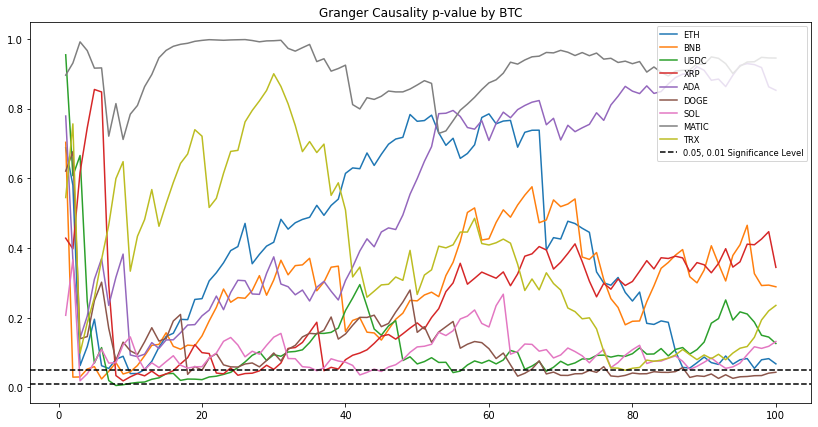

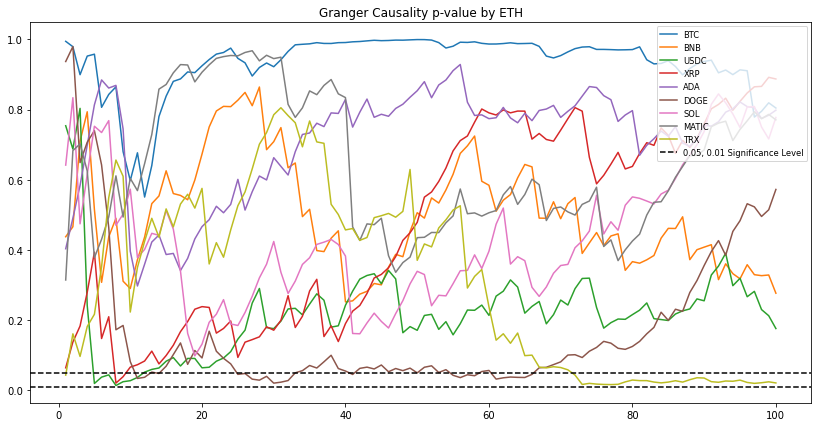

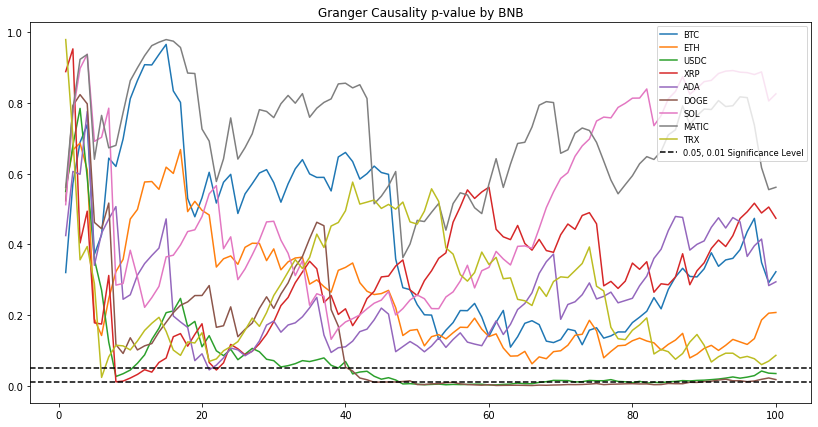

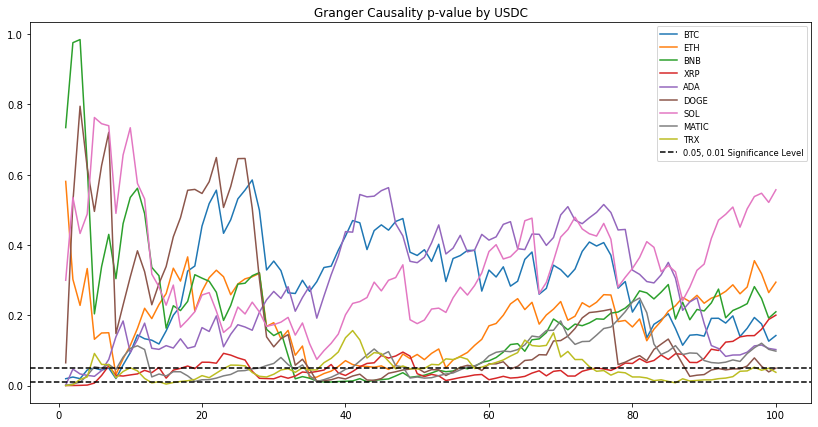

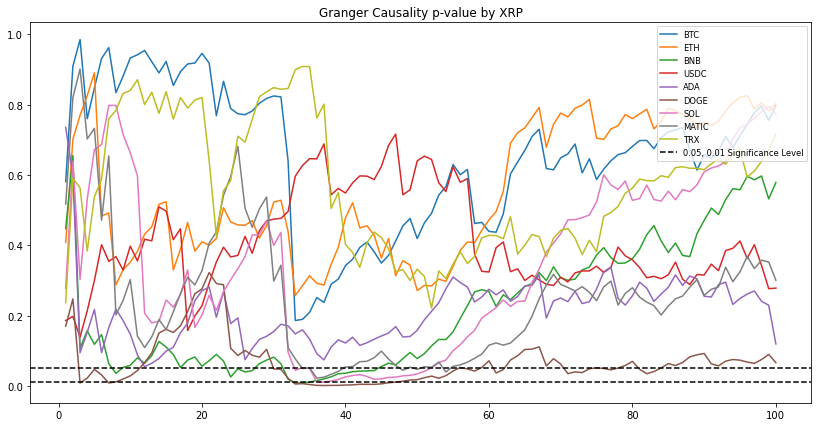

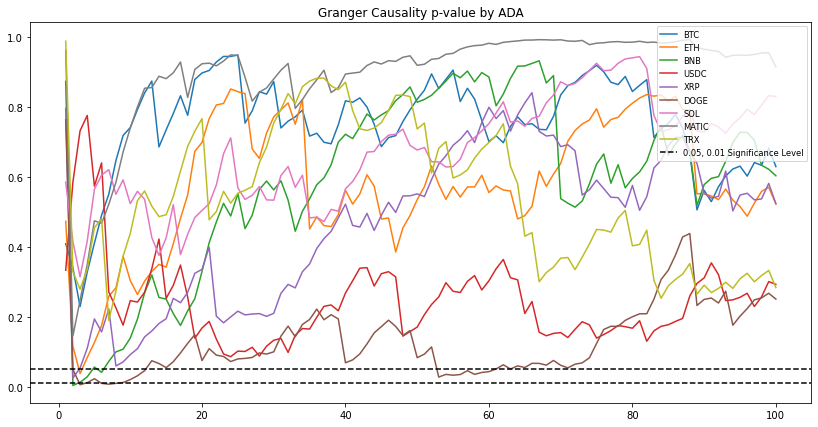

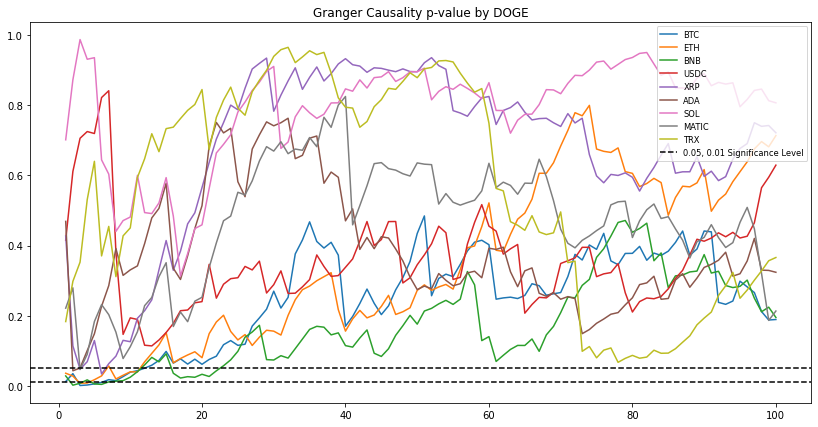

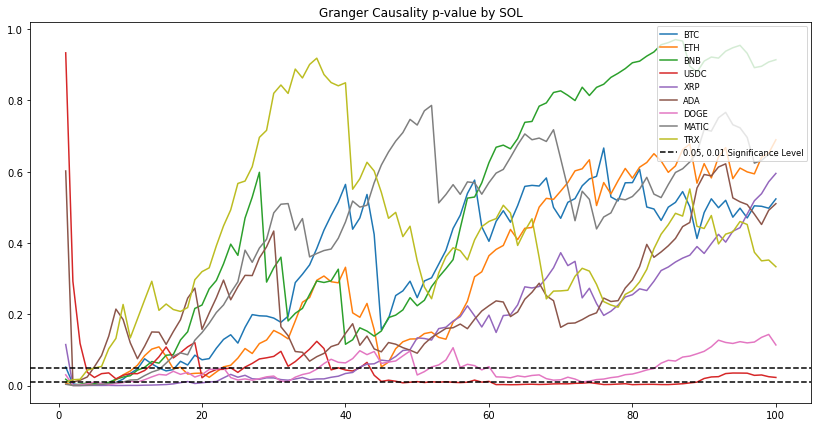

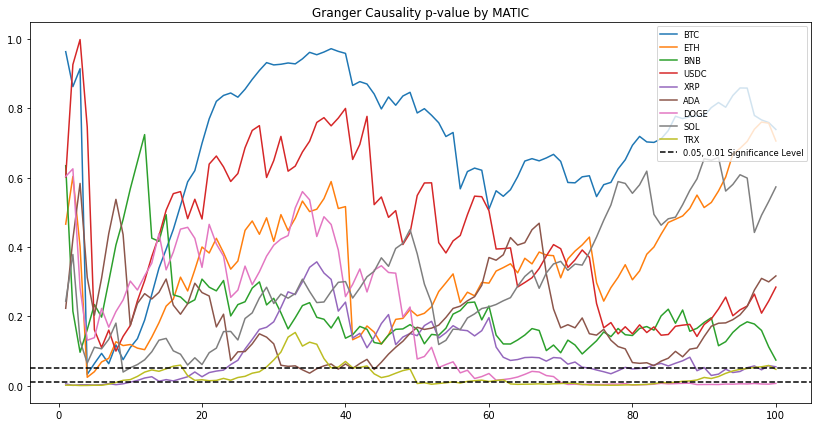

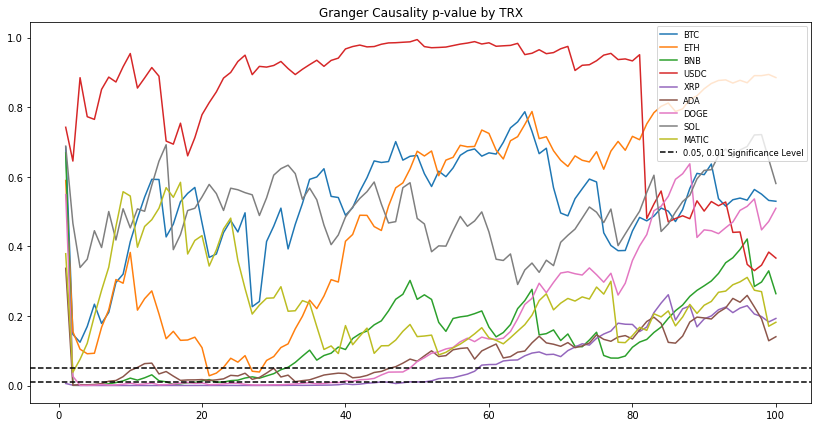

In [2]:
# Granger 인과성 검정 함수 정의
def granger_causality_test(data, maxlag):
    results = {}
    columns = data.columns
    for column in columns:
        results[column] = {}
        for target_column in columns:
            if column != target_column:
                granger_test = grangercausalitytests(data[[column, target_column]], maxlag=maxlag, verbose=False)
                p_values = [round(granger_test[i+1][0]['ssr_ftest'][1], 4) for i in range(maxlag)]
                results[column][target_column] = p_values
    return results

# Granger 인과성 검정 수행
max_lag = 100  # 최대 시차(lag) 설정
granger_results = granger_causality_test(crypto_set, max_lag)

# 결과 출력
for column, result in granger_results.items():
    result_df = pd.DataFrame()
    
    # Z score 확인
    print(f"Granger Causality Test Results for '{column}' ('{column}'가 다른 지표들의 원인이 되는 경우):")
    for target_column, p_values in result.items():
        print(f"- '{target_column}': {p_values}")

        result_df = pd.concat([result_df, pd.DataFrame(p_values, columns=[f'{target_column}'])], axis=1)
        
    result_df.index = range(1, max_lag + 1)
    
    # 그래프 그리기
    plt.figure(figsize=(14,7))
    plt.title(f'Granger Causality p-value by {column}')
    
    for column in result_df.columns:
        plt.plot(result_df.index, result_df[column], label=column)
    
    plt.axhline(0.05, color='black', linestyle='--', label='0.05, 0.01 Significance Level')
    plt.axhline(0.01, color='black', linestyle='--')

    plt.legend(loc='upper right', fontsize='small')